In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Question#1

In [3]:
X = np.loadtxt("DataX.dat")
Y = np.loadtxt("DataY.dat")

m = len(Y)  
n = X.shape[1]   

print(X)
print(Y)

# Standardizing the dataX and dataY
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_standardized = (X - X_mean) / X_std

Y_mean = np.mean(Y)
Y_std = np.std(Y)
Y_standardized = (Y - Y_mean) / Y_std

[[4.104e+03 3.000e+00 2.000e+00]
 [1.600e+03 4.000e+00 2.000e+00]
 [2.400e+03 3.000e+00 4.000e+00]
 [1.416e+03 2.000e+00 1.000e+00]
 [3.000e+03 4.000e+00 3.000e+00]
 [1.985e+03 4.000e+00 3.000e+00]
 [1.534e+03 3.000e+00 2.000e+00]
 [1.427e+03 3.000e+00 2.000e+00]
 [1.380e+03 3.000e+00 2.000e+00]
 [1.494e+03 3.000e+00 2.000e+00]
 [1.940e+03 4.000e+00 3.000e+00]
 [2.000e+03 3.000e+00 2.000e+00]
 [1.890e+03 3.000e+00 2.000e+00]
 [4.478e+03 5.000e+00 3.000e+00]
 [1.268e+03 3.000e+00 2.000e+00]
 [2.300e+03 4.000e+00 3.000e+00]
 [1.320e+03 2.000e+00 1.000e+00]
 [1.236e+03 3.000e+00 2.000e+00]
 [2.609e+03 4.000e+00 3.000e+00]
 [3.031e+03 4.000e+00 3.000e+00]
 [1.767e+03 3.000e+00 2.000e+00]
 [1.888e+03 2.000e+00 1.000e+00]
 [1.604e+03 3.000e+00 2.000e+00]
 [1.962e+03 4.000e+00 3.000e+00]
 [3.890e+03 3.000e+00 2.000e+00]
 [1.100e+03 3.000e+00 2.000e+00]
 [1.458e+03 3.000e+00 2.000e+00]
 [2.526e+03 3.000e+00 2.000e+00]
 [2.200e+03 3.000e+00 2.000e+00]
 [2.637e+03 3.000e+00 2.000e+00]
 [1.839e+0

In [4]:
X_standardized = np.c_[np.ones(m), X_standardized]   # add column of ones
theta = np.random.randn(n+1)   # random weights for gradient descent

alpha = 0.02 
iterations = 500
cost_history = []

for i in range(iterations):
    predictions = X_standardized.dot(theta)
    errors = predictions - Y_standardized
    cost = (1/(2*m)) * np.sum(errors**2)
    cost_history.append(cost)
    gradient = (1/m) * X_standardized.T.dot(errors)
    theta = theta - alpha * gradient

print("Theta from Gradient Descent:", theta)

theta_closed = np.linalg.inv(X_standardized.T.dot(X_standardized)).dot(X_standardized.T).dot(Y_standardized)
print("Theta from Closed Form:", theta_closed)

pred_gd = X_standardized.dot(theta)
pred_cf = X_standardized.dot(theta_closed)

error_gd = np.mean((pred_gd - Y_standardized)**2)
error_cf = np.mean((pred_cf - Y_standardized)**2)

print("Error (Gradient Descent):", error_gd)
print("Error (Closed Form):", error_cf)

Theta from Gradient Descent: [ 1.05523874e-05  8.15639119e-01 -2.75186851e-01  3.03602591e-01]
Theta from Closed Form: [-8.15320034e-17  7.82010048e-01  1.78471012e-01 -1.32375796e-01]
Error (Gradient Descent): 0.3884876458351203
Error (Closed Form): 0.33598973703893426


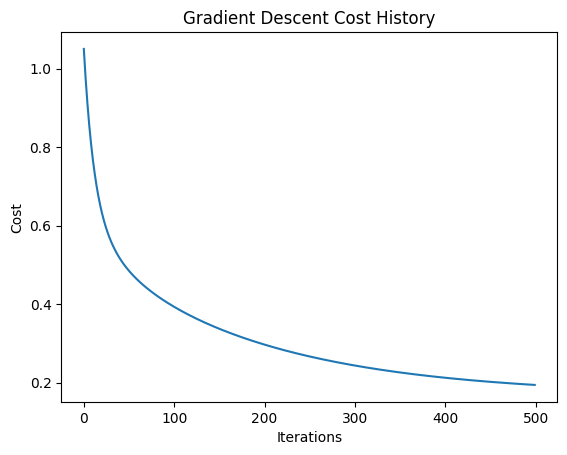

In [5]:
plt.plot(range(iterations), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Gradient Descent Cost History")
plt.show()

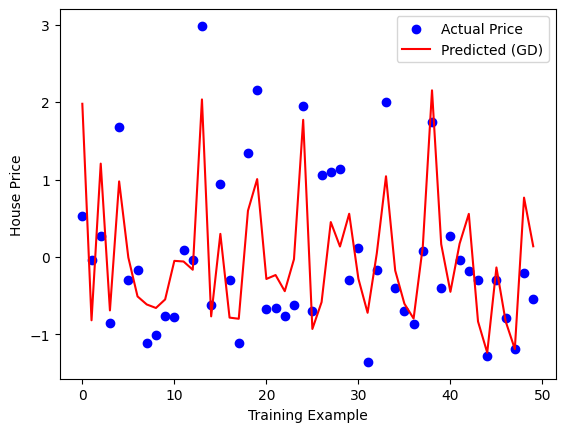

In [6]:
plt.scatter(range(m), Y_standardized, color="blue", label="Actual Price")
plt.plot(range(m), pred_gd, color="red", label="Predicted (GD)")
plt.xlabel("Training Example")
plt.ylabel("House Price")
plt.legend()

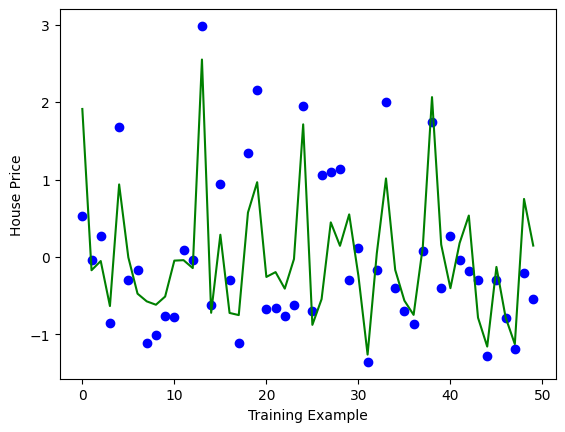

In [11]:
plt.scatter(range(m), Y_standardized, color="blue", label="Actual Price")
plt.plot(range(m), pred_cf, color="green", label="Predicted (Closed Form)")
plt.xlabel("Training Example")
plt.ylabel("House Price")
plt.show()

# Question#2

In [8]:
X = np.loadtxt("DataX.dat")
ClassY = np.loadtxt("ClassY.dat")

X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_standardized = (X - X_mean) / X_std
X_standardized = np.c_[np.ones(m), X_standardized]   # add column of ones for bias

theta_log = np.random.randn(n+1)   # random weights
alpha = 0.01
iterations = 1000
m = len(ClassY)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

for i in range(iterations):
    z = X_standardized.dot(theta_log)
    h = sigmoid(z)
    error = h - ClassY
    gradient = (1/m) * X_standardized.T.dot(error)
    theta_log = theta_log - alpha * gradient

print("Theta from Logistic Regression:", theta_log)

probabilities = sigmoid(X_standardized.dot(theta_log))
predictions = (probabilities >= 0.5).astype(int)

accuracy = np.mean(predictions == ClassY) * 100
print("Accuracy:", accuracy, "%")

Theta from Logistic Regression: [ 0.15913731 -0.12783429  0.11990942 -0.39508036]
Accuracy: 62.0 %


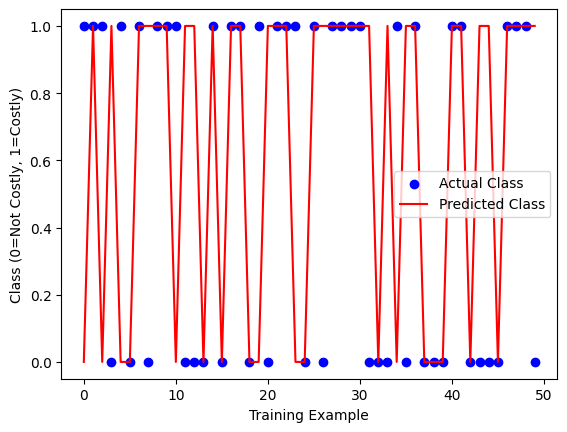

In [9]:
plt.scatter(range(m), ClassY, color="blue", label="Actual Class")
plt.plot(range(m), predictions, color="red", label="Predicted Class")
plt.xlabel("Training Example")
plt.ylabel("Class (0=Not Costly, 1=Costly)")
plt.legend()
plt.show()